In [3]:
import pyannote.core
from pydub import AudioSegment

In [4]:
file = {'uri':'1043_meal', 'audio':'/Users/andrei-macpro/Documents/Data/Audio/sad_demonstration/speech.wav'}

In [80]:
file_pydub = AudioSegment.from_wav("/Users/andrei-macpro/Documents/Data/Audio/sad_demonstration/speech.wav")

In [6]:
import torch
# overlapped speech detection trained on ami training set
model = torch.hub.load('pyannote/pyannote-audio', 'scd_dihard')

Using cache found in /Users/andrei-macpro/.cache/torch/hub/pyannote_pyannote-audio_master


In [7]:
scd = model({'audio':'/Users/andrei-macpro/Documents/Data/Audio/sad_demonstration/speech.wav'})

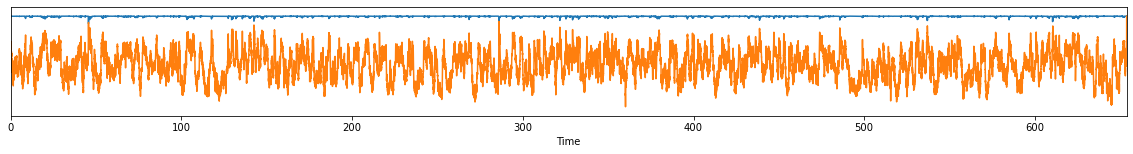

In [18]:
scd

In [72]:
from pyannote.audio.utils.signal import Peak
peak = Peak(alpha=0.10, min_duration=0.10, log_scale=True)

# speaker change point (as `pyannote.core.Timeline` instance)
partition = peak.apply(scd, dimension=1)

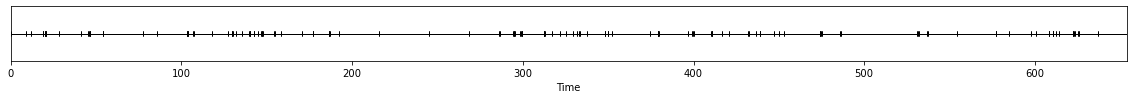

In [17]:
partition #default values

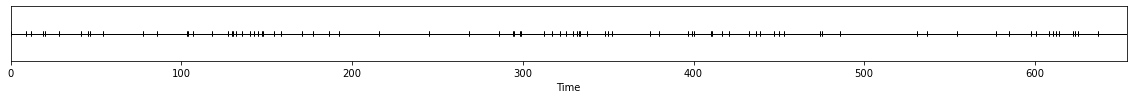

In [73]:
partition

In [25]:
timestamps_scd=dict(partition)

In [14]:
start_times_os=[x*1000 for x in list(timestamps_scd.keys())]
end_times_os=[x*1000 for x in list(timestamps_scd.values())]

In [15]:
speech_segments=[file_pydub[start_time:end_time] for start_time,end_time in zip(start_times_os, end_times_os)]

In [16]:
sum(speech_segments).export('/Users/andrei-macpro/Documents/Data/Audio/scd_1047_dihard.wav', format="wav")


<_io.BufferedRandom name='/Users/andrei-macpro/Documents/Data/Audio/scd_1047_dihard.wav'>

In [10]:
for scp in partition: #ohhh so it only detects speech that comes right after (so its like super close) other speech 
    print(scp)   # default min duration

[ 00:00:00.000 -->  00:00:08.700]
[ 00:00:08.700 -->  00:00:11.932]
[ 00:00:11.932 -->  00:00:18.785]
[ 00:00:18.785 -->  00:00:19.110]
[ 00:00:19.110 -->  00:00:20.008]
[ 00:00:20.008 -->  00:00:20.163]
[ 00:00:20.163 -->  00:00:20.452]
[ 00:00:20.452 -->  00:00:20.648]
[ 00:00:20.648 -->  00:00:28.294]
[ 00:00:28.294 -->  00:00:41.205]
[ 00:00:41.205 -->  00:00:45.560]
[ 00:00:45.560 -->  00:00:45.928]
[ 00:00:45.928 -->  00:00:46.310]
[ 00:00:46.310 -->  00:00:46.571]
[ 00:00:46.571 -->  00:00:53.807]
[ 00:00:53.807 -->  00:00:53.991]
[ 00:00:53.991 -->  00:01:17.544]
[ 00:01:17.544 -->  00:01:25.509]
[ 00:01:25.509 -->  00:01:43.310]
[ 00:01:43.310 -->  00:01:43.518]
[ 00:01:43.518 -->  00:01:43.826]
[ 00:01:43.826 -->  00:01:43.993]
[ 00:01:43.993 -->  00:01:47.006]
[ 00:01:47.006 -->  00:01:47.335]
[ 00:01:47.335 -->  00:01:57.645]
[ 00:01:57.645 -->  00:02:07.416]
[ 00:02:07.416 -->  00:02:09.492]
[ 00:02:09.492 -->  00:02:09.711]
[ 00:02:09.711 -->  00:02:10.006]
[ 00:02:10.006

In [54]:
from pyannote.core import Timeline
long_turns = Timeline(segments=[s for s in partition if s.duration > 2.])

In [69]:
for turn in partition:
    print(turn)

[ 00:00:00.000 -->  00:00:08.700]
[ 00:00:08.700 -->  00:00:11.932]
[ 00:00:11.932 -->  00:00:18.785]
[ 00:00:18.785 -->  00:00:19.110]
[ 00:00:19.110 -->  00:00:20.008]
[ 00:00:20.008 -->  00:00:20.163]
[ 00:00:20.163 -->  00:00:20.452]
[ 00:00:20.452 -->  00:00:20.648]
[ 00:00:20.648 -->  00:00:28.294]
[ 00:00:28.294 -->  00:00:41.205]
[ 00:00:41.205 -->  00:00:45.560]
[ 00:00:45.560 -->  00:00:45.928]
[ 00:00:45.928 -->  00:00:46.310]
[ 00:00:46.310 -->  00:00:46.571]
[ 00:00:46.571 -->  00:00:53.807]
[ 00:00:53.807 -->  00:00:53.991]
[ 00:00:53.991 -->  00:01:17.544]
[ 00:01:17.544 -->  00:01:25.509]
[ 00:01:25.509 -->  00:01:43.310]
[ 00:01:43.310 -->  00:01:43.518]
[ 00:01:43.518 -->  00:01:43.826]
[ 00:01:43.826 -->  00:01:43.993]
[ 00:01:43.993 -->  00:01:47.006]
[ 00:01:47.006 -->  00:01:47.335]
[ 00:01:47.335 -->  00:01:57.645]
[ 00:01:57.645 -->  00:02:07.416]
[ 00:02:07.416 -->  00:02:09.492]
[ 00:02:09.492 -->  00:02:09.711]
[ 00:02:09.711 -->  00:02:10.006]
[ 00:02:10.006

In [76]:
timestamps_scd=dict(partition)

In [78]:
start_times_speech=[x*1000 for x in list(timestamps_scd.keys())]
end_times_speech=[x*1000 for x in list(timestamps_scd.values())]

In [81]:
speech_segments=[file_pydub[start_time:end_time] for start_time,end_time in zip(start_times_speech, end_times_speech)]

In [ ]:
speech_segments_cv, speech_segments_bb

In [110]:
speech_segments_cv=list()
speech_segments_bb = list()
for start_time,end_time in zip(range(len(start_times_speech)), range(len(end_times_speech))):
    if start_time%2 == 0:
        speech_segments_cv.append(file_pydub[start_times_speech[start_time]:end_times_speech[end_time]])
    else:
        speech_segments_bb.append(file_pydub[start_times_speech[start_time]:end_times_speech[end_time]])

In [111]:
len(speech_segments_cv), len(speech_segments_bb)

(43, 42)

In [107]:
len(speech_segments)

85

In [121]:
#diarization
sum(speech_segments_cv).export('/Users/andrei-macpro/Documents/Data/Audio/1043_cv_speech.wav', format="wav")
sum(speech_segments_bb).export('/Users/andrei-macpro/Documents/Data/Audio/1043_bb_speech.wav', format="wav")

<_io.BufferedRandom name='/Users/andrei-macpro/Documents/Data/Audio/1043_bb_speech.wav'>